- Author: Syeda Masooma Naqvi
- USC id: 3344388868
- GitHub id: SyedaMasooma-CS 

#### Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
import re
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Loading Test Data Files

In [119]:
#Test Data

#bending1
bend11 = pd.read_csv('./../data/AReM/bending1/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend12 = pd.read_csv('./../data/AReM/bending1/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#bending2
bend21 = pd.read_csv('./../data/AReM/bending2/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend22 = pd.read_csv('./../data/AReM/bending2/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#cycling
cyc1 = pd.read_csv('./../data/AReM/cycling/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc2 = pd.read_csv('./../data/AReM/cycling/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc3 = pd.read_csv('./../data/AReM/cycling/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#lying
ly1 = pd.read_csv('./../data/AReM/lying/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly2 = pd.read_csv('./../data/AReM/lying/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly3 = pd.read_csv('./../data/AReM/lying/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#sitting
sit1 = pd.read_csv('./../data/AReM/sitting/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit2 = pd.read_csv('./../data/AReM/sitting/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit3 = pd.read_csv('./../data/AReM/sitting/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#standing
stand1 = pd.read_csv('./../data/AReM/standing/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand2 = pd.read_csv('./../data/AReM/standing/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand3 = pd.read_csv('./../data/AReM/standing/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#walking
walk1 = pd.read_csv('./../data/AReM/walking/dataset1.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk2 = pd.read_csv('./../data/AReM/walking/dataset2.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk3 = pd.read_csv('./../data/AReM/walking/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')


In [120]:
# creating an identifier variable for each instance

bend11['dataset'] = 1
bend12['dataset'] = 2
bend21['dataset'] = 3
bend22['dataset'] = 4
cyc1['dataset'] = 5
cyc2['dataset'] = 6
cyc3['dataset'] = 7
ly1['dataset'] = 8
ly2['dataset'] = 9
ly3['dataset'] = 10
sit1['dataset'] = 11
sit2['dataset'] = 12 
sit3['dataset'] = 13 
walk1['dataset'] = 14
walk2['dataset'] = 15
walk3['dataset'] = 16
stand1['dataset'] = 17
stand2['dataset'] = 18
stand3['dataset'] = 19

Concatenating the test datasets together

In [121]:
# data = [bend11,bend12,bend21,bend22,cyc1,cyc2,cyc3,ly1,ly2,ly3,sit1,sit2,sit3,walk1,walk2,walk3]
test = pd.concat([bend11,bend12,bend21,bend22,cyc1,cyc2,cyc3,ly1,ly2,ly3,sit1,sit2,sit3,walk1,walk2,walk3,stand1,stand2,stand3],ignore_index=True)
test = test.rename(columns={'# Columns: time': 'time'})
test = test.drop(['time'],axis=1)
test

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,dataset
0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,39.25,0.43,23.00,0.00,33.00,0.00,1
2,39.25,0.43,23.25,0.43,33.00,0.00,1
3,39.50,0.50,23.00,0.71,33.00,0.00,1
4,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...
9115,41.25,0.83,19.75,0.43,17.00,0.71,19
9116,41.50,0.50,20.75,0.43,17.25,0.83,19
9117,41.50,0.50,20.75,0.43,15.75,0.83,19
9118,41.50,0.50,20.50,0.50,15.75,0.83,19


In [122]:
#Loading all the Train Datasets

#bending1
bend13 = pd.read_csv('./../data/AReM/bending1/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend14 = pd.read_csv('./../data/AReM/bending1/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend15 = pd.read_csv('./../data/AReM/bending1/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend16 = pd.read_csv('./../data/AReM/bending1/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend17 = pd.read_csv('./../data/AReM/bending1/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#bending2
bend23 = pd.read_csv('./../data/AReM/bending2/dataset3.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend24 = pd.read_csv('./../data/AReM/bending2/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend25 = pd.read_csv('./../data/AReM/bending2/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
bend26 = pd.read_csv('./../data/AReM/bending2/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#cycling
cyc4 = pd.read_csv('./../data/AReM/cycling/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc5 = pd.read_csv('./../data/AReM/cycling/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc6 = pd.read_csv('./../data/AReM/cycling/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc7 = pd.read_csv('./../data/AReM/cycling/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc8 = pd.read_csv('./../data/AReM/cycling/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc9 = pd.read_csv('./../data/AReM/cycling/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc10 = pd.read_csv('./../data/AReM/cycling/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc11 = pd.read_csv('./../data/AReM/cycling/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc12 = pd.read_csv('./../data/AReM/cycling/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc13 = pd.read_csv('./../data/AReM/cycling/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc14 = pd.read_csv('./../data/AReM/cycling/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
cyc15 = pd.read_csv('./../data/AReM/cycling/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#lying
ly4 = pd.read_csv('./../data/AReM/lying/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly5 = pd.read_csv('./../data/AReM/lying/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly6 = pd.read_csv('./../data/AReM/lying/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly7 = pd.read_csv('./../data/AReM/lying/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly8 = pd.read_csv('./../data/AReM/lying/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly9 = pd.read_csv('./../data/AReM/lying/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly10 = pd.read_csv('./../data/AReM/lying/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly11 = pd.read_csv('./../data/AReM/lying/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly12 = pd.read_csv('./../data/AReM/lying/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly13 = pd.read_csv('./../data/AReM/lying/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly14 = pd.read_csv('./../data/AReM/lying/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
ly15 = pd.read_csv('./../data/AReM/lying/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#sitting
sit4 = pd.read_csv('./../data/AReM/sitting/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit5 = pd.read_csv('./../data/AReM/sitting/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit6 = pd.read_csv('./../data/AReM/sitting/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit7 = pd.read_csv('./../data/AReM/sitting/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit8 = pd.read_csv('./../data/AReM/sitting/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit9 = pd.read_csv('./../data/AReM/sitting/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit10 = pd.read_csv('./../data/AReM/sitting/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit11 = pd.read_csv('./../data/AReM/sitting/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit12 = pd.read_csv('./../data/AReM/sitting/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit13 = pd.read_csv('./../data/AReM/sitting/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit14 = pd.read_csv('./../data/AReM/sitting/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
sit15 = pd.read_csv('./../data/AReM/sitting/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#standing
stand4 = pd.read_csv('./../data/AReM/standing/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand5 = pd.read_csv('./../data/AReM/standing/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand6 = pd.read_csv('./../data/AReM/standing/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand7 = pd.read_csv('./../data/AReM/standing/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand8 = pd.read_csv('./../data/AReM/standing/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand9 = pd.read_csv('./../data/AReM/standing/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand10 = pd.read_csv('./../data/AReM/standing/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand11 = pd.read_csv('./../data/AReM/standing/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand12 = pd.read_csv('./../data/AReM/standing/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand13 = pd.read_csv('./../data/AReM/standing/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand14 = pd.read_csv('./../data/AReM/standing/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
stand15 = pd.read_csv('./../data/AReM/standing/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')

#walking
walk4 = pd.read_csv('./../data/AReM/walking/dataset4.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk5 = pd.read_csv('./../data/AReM/walking/dataset5.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk6 = pd.read_csv('./../data/AReM/walking/dataset6.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk7 = pd.read_csv('./../data/AReM/walking/dataset7.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk8 = pd.read_csv('./../data/AReM/walking/dataset8.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk9 = pd.read_csv('./../data/AReM/walking/dataset9.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk10 = pd.read_csv('./../data/AReM/walking/dataset10.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk11 = pd.read_csv('./../data/AReM/walking/dataset11.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk12 = pd.read_csv('./../data/AReM/walking/dataset12.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk13 = pd.read_csv('./../data/AReM/walking/dataset13.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk14 = pd.read_csv('./../data/AReM/walking/dataset14.csv', sep=',', skiprows = 4,header=0, engine = 'python')
walk15 = pd.read_csv('./../data/AReM/walking/dataset15.csv', sep=',', skiprows = 4,header=0, engine = 'python')


In [123]:
# creating an identifier variable for each instance

bend13['dataset']=20
bend14['dataset']=21
bend15['dataset']=22
bend16['dataset']=23
bend17['dataset']=24
bend23['dataset']=25
bend24['dataset']=26
bend25['dataset']=27
bend26['dataset']=28
cyc4['dataset']=29
cyc5['dataset']=30
cyc6['dataset']=31
cyc7['dataset']=32
cyc8['dataset']=33
cyc9['dataset']=34
cyc10['dataset']=35
cyc11['dataset']=36
cyc12['dataset']=37
cyc13['dataset']=38
cyc14['dataset']=39
cyc15['dataset']=40
ly4['dataset']=41
ly5['dataset']=42
ly6['dataset']=43
ly7['dataset']=44
ly8['dataset']=45
ly9['dataset']=46
ly10['dataset']=47
ly11['dataset']=48
ly12['dataset']=49
ly13['dataset']=50
ly14['dataset']=51
ly15['dataset']=52
sit4['dataset']=53
sit5['dataset']=54
sit6['dataset']=55
sit7['dataset']=56
sit8['dataset']=57
sit9['dataset']=58
sit10['dataset']=59
sit11['dataset']=60
sit12['dataset']=61
sit13['dataset']=62
sit14['dataset']=63
sit15['dataset']=64
walk4['dataset']=65
walk5['dataset']=66
walk6['dataset']=67
walk7['dataset']=68
walk8['dataset']=69
walk9['dataset']=70
walk10['dataset']=71
walk11['dataset']=72
walk12['dataset']=73
walk13['dataset']=74
walk14['dataset']=75
walk15['dataset']=76
stand4['dataset']=77
stand5['dataset']=78
stand6['dataset']=79
stand7['dataset']=80
stand8['dataset']=81
stand9['dataset']=82
stand10['dataset']=83
stand11['dataset']=84
stand12['dataset']=85
stand13['dataset']=86
stand14['dataset']=87
stand15['dataset']=88

Concatenating the train datasets together

In [124]:
train = pd.concat([bend13,bend14,bend15,bend16,bend17,bend23,bend24,bend25,bend26,cyc4,
        cyc5,cyc6,cyc7,cyc8,cyc9,cyc10,cyc11,cyc12,cyc13,cyc14,cyc15,ly4,ly5,ly6,ly7,ly8,ly9,ly10,ly11,ly12,
        ly13,ly14,ly15,sit4,sit5,sit6,sit7,sit8,sit9,sit10,sit11,sit12,sit13,sit14,sit15,walk4,walk5,walk6,
        walk7,walk8,walk9,walk10,walk11,walk12,walk13,walk14,walk15,stand4,stand5,stand6,stand7,stand8,
                   stand9,stand10,stand11,stand12,stand13,stand14,stand15],ignore_index=True)
train = train.rename(columns={'# Columns: time': 'time'})
train = train.drop(['time'],axis=1)
train

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,dataset
0,42.00,0.71,21.25,0.43,30.00,0.00,20
1,41.50,0.50,20.25,1.48,31.25,1.09,20
2,41.50,0.50,14.25,1.92,33.00,0.00,20
3,40.75,0.83,15.75,0.43,33.00,0.00,20
4,40.00,0.71,20.00,2.74,32.75,0.43,20
...,...,...,...,...,...,...,...
33114,45.25,0.43,12.25,0.43,13.75,0.83,88
33115,45.00,0.00,12.60,0.80,14.25,0.83,88
33116,45.00,0.00,12.00,0.00,14.50,0.50,88
33117,45.50,0.50,12.25,0.43,14.50,0.50,88


### c.i.
- Mean: The average value of a time series.
- Standard deviation: The measure of dispersion of a time series.
- Variance: The measure of how far a set of numbers are spread out.
- Skewness: A measure of the degree of asymmetry of a distribution.
- Kurtosis: A measure of the "tailedness" of the probability distribution of a real-valued random variable.
- Minimum: The lowest value observed in a time series.
- Maximum: The highest value observed in a time series.
- Range: The difference between the maximum and minimum values in a time series.
- Median: The middle value in a time series.
- Interquartile range (IQR): The range between the 25th and 75th percentiles in a time series.
- Autocorrelation: A measure of the degree of similarity between a time series and a delayed version of itself.
- Cross-correlation: A measure of the degree of similarity between two time series.
- Root mean square (RMS): The square root of the mean of the squared values in a time series.
- Zero-crossing rate: The rate at which a time series crosses the zero line.
- Energy: The sum of the squared values in a time series.
- Entropy: A measure of the disorder or randomness in a time series.

### c.ii.


In [125]:
# Making a single dataset with train and test data

data = pd.concat([test,train],ignore_index=True)
data

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,dataset
0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,39.25,0.43,23.00,0.00,33.00,0.00,1
2,39.25,0.43,23.25,0.43,33.00,0.00,1
3,39.50,0.50,23.00,0.71,33.00,0.00,1
4,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...
42234,45.25,0.43,12.25,0.43,13.75,0.83,88
42235,45.00,0.00,12.60,0.80,14.25,0.83,88
42236,45.00,0.00,12.00,0.00,14.50,0.50,88
42237,45.50,0.50,12.25,0.43,14.50,0.50,88


Extracting Time Domain Features

In [126]:
result=data.groupby('dataset',as_index = False).agg(['mean','min','max','median','std'])
result.columns = ['_'.join(col).strip() for col in result.columns.values]

In [127]:
r1=data.groupby('dataset',as_index = False).quantile(0.25)
r1=r1.add_suffix('_1stquartile')
r1=r1.rename(columns={'dataset_1stquartile':'dataset'})

In [128]:
r2=data.groupby('dataset',as_index = False).quantile(0.75)
r2=r2.add_suffix('_3rdquart')
r2=r2.rename(columns={'dataset_3rdquart':'dataset'})

In [129]:
result =pd.merge(pd.merge(r1,r2,on='dataset'),result,on='dataset')
df_vis = result.copy()
result = result.rename(columns={'dataset': 'instance'})
result.set_index('instance', inplace=True)
result

,avg_rss12_1stquartile,var_rss12_1stquartile,avg_rss13_1stquartile,var_rss13_1stquartile,avg_rss23_1stquartile,var_rss23_1stquartile,avg_rss12_3rdquart,var_rss12_3rdquart,avg_rss13_3rdquart,var_rss13_3rdquart,avg_rss23_3rdquart,var_rss23_3rdquart,avg_rss12_mean,avg_rss12_min,avg_rss12_max,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_min,var_rss12_max,var_rss12_median,var_rss12_std,avg_rss13_mean,avg_rss13_min,avg_rss13_max,avg_rss13_median,avg_rss13_std,var_rss13_mean,var_rss13_min,var_rss13_max,var_rss13_median,var_rss13_std,avg_rss23_mean,avg_rss23_min,avg_rss23_max,avg_rss23_median,avg_rss23_std,var_rss23_mean,var_rss23_min,var_rss23_max,var_rss23_median,var_rss23_std
instance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39.2500,0.0,16.0000,0.00,33.0000,0.00,42.00,0.50,23.2500,1.1200,36.00,1.30,40.624792,37.25,45.00,40.50,1.476967,0.358604,0.0,1.30,0.43,0.322605,19.040937,4.0,29.50,19.25,4.462952,0.832542,0.0,7.23,0.50,0.965659,34.311292,27.25,38.25,35.00,2.188449,0.570583,0.0,1.92,0.43,0.582915
2,42.0000,0.0,19.0000,0.00,32.0000,0.00,43.67,0.50,22.2500,1.1450,34.50,1.30,42.812812,38.00,45.67,42.50,1.435550,0.372438,0.0,1.22,0.47,0.289158,20.096979,2.0,29.50,21.00,3.893737,0.876437,0.0,5.76,0.50,1.047259,33.024583,27.67,38.50,33.00,1.995255,0.571083,0.0,3.11,0.43,0.601010
3,23.1875,0.0,18.0000,0.00,20.5000,0.43,26.50,0.71,22.0000,0.8700,27.00,0.87,24.562958,12.75,51.00,24.25,3.737514,0.590833,0.0,6.87,0.43,0.837408,19.121333,0.0,25.33,20.25,4.299612,0.736771,0.0,6.76,0.47,0.927048,23.493042,10.67,30.00,23.75,3.693786,0.700187,0.0,4.97,0.50,0.693720
4,25.5000,0.0,18.0000,0.00,15.0000,0.47,30.00,0.50,22.5000,0.9400,20.75,1.30,27.464604,0.00,42.75,28.00,3.583582,0.449708,0.0,7.76,0.43,0.767197,20.842542,7.5,35.00,20.75,3.826268,0.779917,0.0,5.76,0.50,0.904436,17.617938,0.00,33.00,18.00,5.053642,1.122125,0.0,6.76,0.83,1.012342
5,34.5000,1.3,14.2500,1.64,17.9500,1.50,40.25,3.13,19.0000,3.9175,21.75,3.90,37.177042,24.25,45.00,36.25,3.581301,2.374208,0.0,8.58,1.92,1.601799,16.531083,5.5,26.75,16.67,3.430906,2.910604,0.0,8.05,2.62,1.600137,19.607250,7.00,25.50,20.00,2.890347,2.921729,0.0,9.34,2.50,1.852600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,41.0000,0.0,9.7300,0.43,12.6275,0.47,44.50,0.50,17.5000,1.0200,17.50,1.22,42.516958,37.00,48.25,42.50,2.195751,0.440688,0.0,2.12,0.47,0.349430,13.218729,1.0,21.75,13.50,4.735349,0.799937,0.0,5.61,0.50,0.867768,14.639750,1.00,21.00,15.00,3.623557,0.977417,0.0,6.85,0.83,0.853280
85,42.0000,0.0,11.0000,0.00,14.0000,0.43,44.33,0.50,13.3300,0.8300,16.69,0.95,42.959354,36.25,45.50,42.67,1.500878,0.352875,0.0,2.60,0.47,0.313585,11.780437,0.0,22.00,12.00,3.021746,0.564187,0.0,4.72,0.47,0.638179,14.946021,0.00,20.25,15.25,2.702605,0.748479,0.0,4.00,0.82,0.461152
86,40.0000,0.0,11.6275,0.00,12.7500,0.43,44.75,0.50,14.3300,0.8200,16.50,0.94,42.674583,36.00,47.33,43.67,2.384170,0.419167,0.0,2.17,0.47,0.368383,12.110708,0.0,21.00,12.67,3.556720,0.567500,0.0,5.56,0.43,0.718364,14.247458,0.00,19.67,14.50,3.261617,0.702042,0.0,3.77,0.50,0.567451


In [130]:
result

,avg_rss12_1stquartile,var_rss12_1stquartile,avg_rss13_1stquartile,var_rss13_1stquartile,avg_rss23_1stquartile,var_rss23_1stquartile,avg_rss12_3rdquart,var_rss12_3rdquart,avg_rss13_3rdquart,var_rss13_3rdquart,avg_rss23_3rdquart,var_rss23_3rdquart,avg_rss12_mean,avg_rss12_min,avg_rss12_max,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_min,var_rss12_max,var_rss12_median,var_rss12_std,avg_rss13_mean,avg_rss13_min,avg_rss13_max,avg_rss13_median,avg_rss13_std,var_rss13_mean,var_rss13_min,var_rss13_max,var_rss13_median,var_rss13_std,avg_rss23_mean,avg_rss23_min,avg_rss23_max,avg_rss23_median,avg_rss23_std,var_rss23_mean,var_rss23_min,var_rss23_max,var_rss23_median,var_rss23_std
instance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39.2500,0.0,16.0000,0.00,33.0000,0.00,42.00,0.50,23.2500,1.1200,36.00,1.30,40.624792,37.25,45.00,40.50,1.476967,0.358604,0.0,1.30,0.43,0.322605,19.040937,4.0,29.50,19.25,4.462952,0.832542,0.0,7.23,0.50,0.965659,34.311292,27.25,38.25,35.00,2.188449,0.570583,0.0,1.92,0.43,0.582915
2,42.0000,0.0,19.0000,0.00,32.0000,0.00,43.67,0.50,22.2500,1.1450,34.50,1.30,42.812812,38.00,45.67,42.50,1.435550,0.372438,0.0,1.22,0.47,0.289158,20.096979,2.0,29.50,21.00,3.893737,0.876437,0.0,5.76,0.50,1.047259,33.024583,27.67,38.50,33.00,1.995255,0.571083,0.0,3.11,0.43,0.601010
3,23.1875,0.0,18.0000,0.00,20.5000,0.43,26.50,0.71,22.0000,0.8700,27.00,0.87,24.562958,12.75,51.00,24.25,3.737514,0.590833,0.0,6.87,0.43,0.837408,19.121333,0.0,25.33,20.25,4.299612,0.736771,0.0,6.76,0.47,0.927048,23.493042,10.67,30.00,23.75,3.693786,0.700187,0.0,4.97,0.50,0.693720
4,25.5000,0.0,18.0000,0.00,15.0000,0.47,30.00,0.50,22.5000,0.9400,20.75,1.30,27.464604,0.00,42.75,28.00,3.583582,0.449708,0.0,7.76,0.43,0.767197,20.842542,7.5,35.00,20.75,3.826268,0.779917,0.0,5.76,0.50,0.904436,17.617938,0.00,33.00,18.00,5.053642,1.122125,0.0,6.76,0.83,1.012342
5,34.5000,1.3,14.2500,1.64,17.9500,1.50,40.25,3.13,19.0000,3.9175,21.75,3.90,37.177042,24.25,45.00,36.25,3.581301,2.374208,0.0,8.58,1.92,1.601799,16.531083,5.5,26.75,16.67,3.430906,2.910604,0.0,8.05,2.62,1.600137,19.607250,7.00,25.50,20.00,2.890347,2.921729,0.0,9.34,2.50,1.852600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,41.0000,0.0,9.7300,0.43,12.6275,0.47,44.50,0.50,17.5000,1.0200,17.50,1.22,42.516958,37.00,48.25,42.50,2.195751,0.440688,0.0,2.12,0.47,0.349430,13.218729,1.0,21.75,13.50,4.735349,0.799937,0.0,5.61,0.50,0.867768,14.639750,1.00,21.00,15.00,3.623557,0.977417,0.0,6.85,0.83,0.853280
85,42.0000,0.0,11.0000,0.00,14.0000,0.43,44.33,0.50,13.3300,0.8300,16.69,0.95,42.959354,36.25,45.50,42.67,1.500878,0.352875,0.0,2.60,0.47,0.313585,11.780437,0.0,22.00,12.00,3.021746,0.564187,0.0,4.72,0.47,0.638179,14.946021,0.00,20.25,15.25,2.702605,0.748479,0.0,4.00,0.82,0.461152
86,40.0000,0.0,11.6275,0.00,12.7500,0.43,44.75,0.50,14.3300,0.8200,16.50,0.94,42.674583,36.00,47.33,43.67,2.384170,0.419167,0.0,2.17,0.47,0.368383,12.110708,0.0,21.00,12.67,3.556720,0.567500,0.0,5.56,0.43,0.718364,14.247458,0.00,19.67,14.50,3.261617,0.702042,0.0,3.77,0.50,0.567451


### c.iii.

In [131]:
# Estimating the standard deviation of each of the time-domain features

stds = result.iloc[:,0:].describe().loc['std']
stds = pd.DataFrame(stds)
stds.rename(columns = {'std':'Standard Deviation'}, 
            inplace = True)
stds.index.names = ['Time-Domain Feature']
stds = stds.reset_index()
stds

,Time-Domain Feature,Standard Deviation
0,avg_rss12_1stquartile,6.153590
1,var_rss12_1stquartile,0.946386
2,avg_rss13_1stquartile,4.220658
3,var_rss13_1stquartile,0.843620
4,avg_rss23_1stquartile,6.096465
5,var_rss23_1stquartile,0.758584
6,avg_rss12_3rdquart,5.138925
7,var_rss12_3rdquart,2.125266
8,avg_rss13_3rdquart,4.171628
9,var_rss13_3rdquart,1.552504


In [132]:
alpha = 0.1
feat = result.iloc[:, 0:]
sd = []
for i in range(1000):
    sample = resample(feat)
#     f = sample.describe().loc['std']
    f = sample.apply(lambda x: np.std(x))
    sd.append(f)
sd = pd.DataFrame(sd)
sd.columns = list(feat.columns)
sd
res = sd.apply(lambda x : (np.percentile(x, 5),np.percentile(x, 95)), axis=0)
# res.apply(np.around, args=(2,))
res = res.T
res.columns = ['Upper',"Lower"]
res.index.names = ['Time-Domain Feature']
res

,Upper,Lower
Time-Domain Feature,,
avg_rss12_1stquartile,5.527475,6.632913
var_rss12_1stquartile,0.827599,1.023845
avg_rss13_1stquartile,3.609677,4.669475
var_rss13_1stquartile,0.766182,0.884474
avg_rss23_1stquartile,4.766681,7.160775
var_rss23_1stquartile,0.683175,0.802941
avg_rss12_3rdquart,4.267873,5.844200
var_rss12_3rdquart,1.883740,2.278702
avg_rss13_3rdquart,3.544858,4.663440


### c.iv

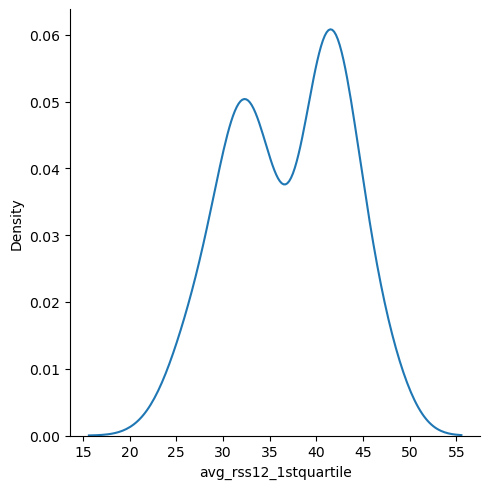

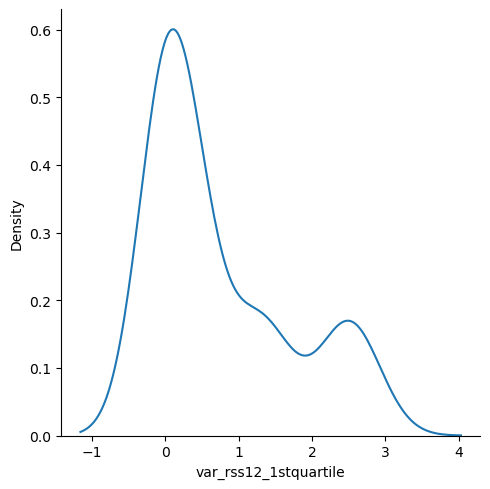

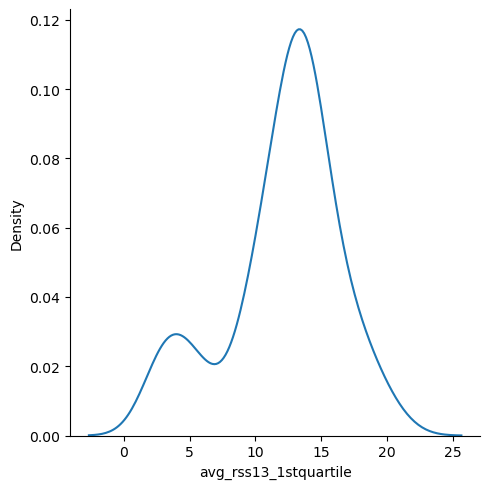

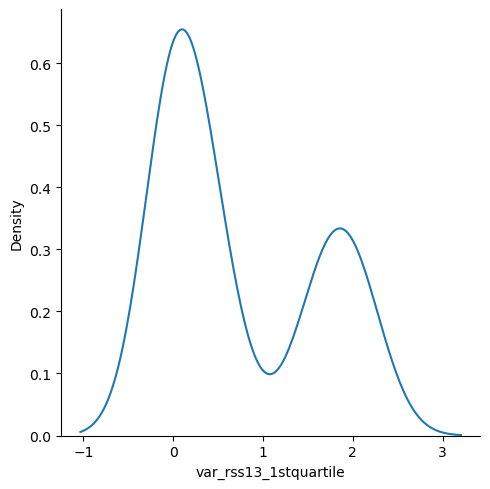

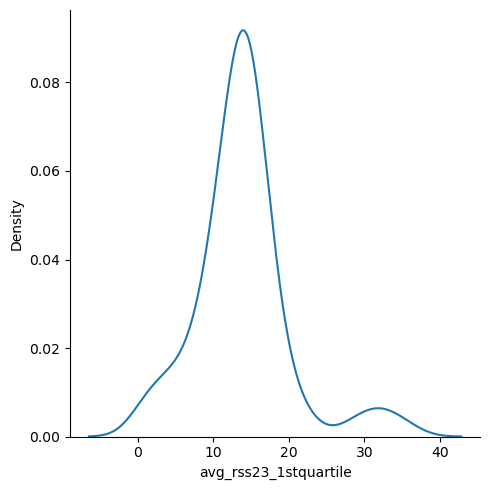

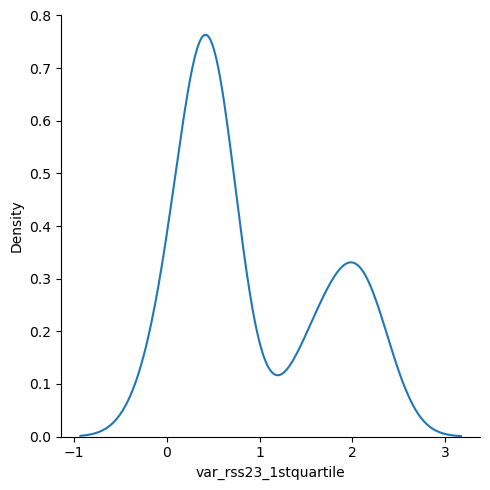

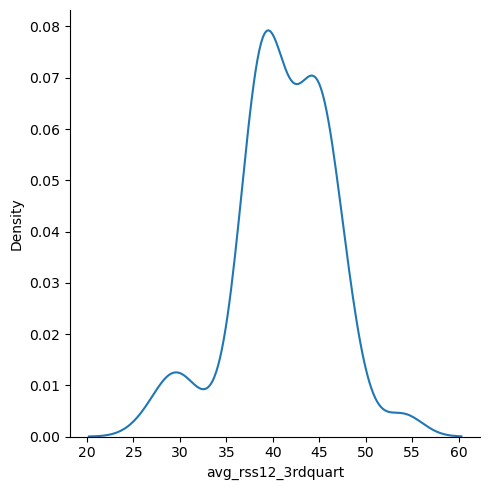

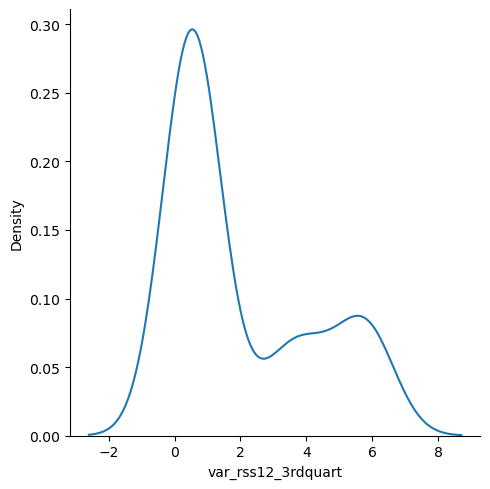

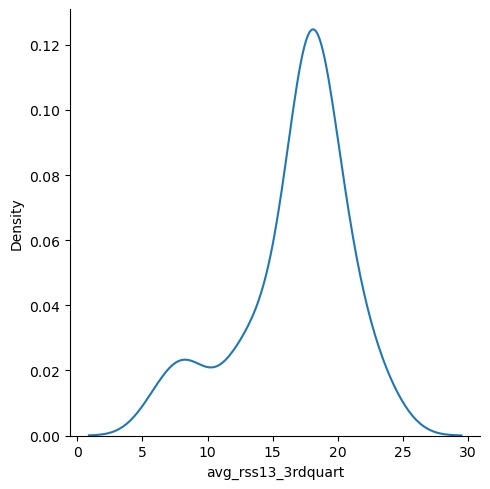

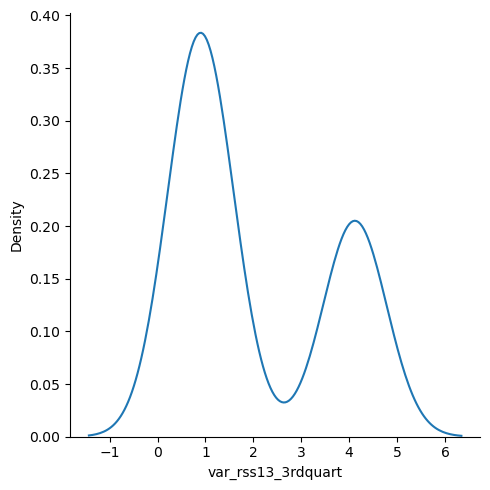

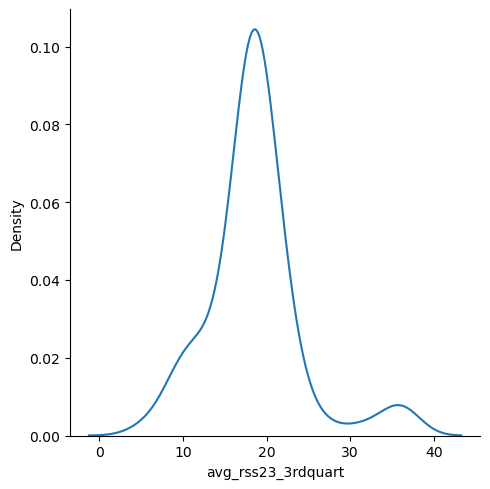

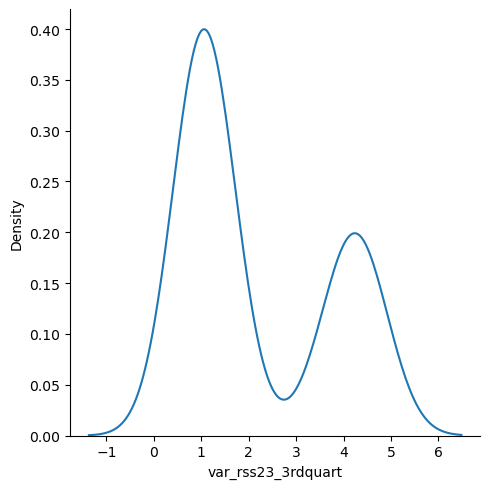

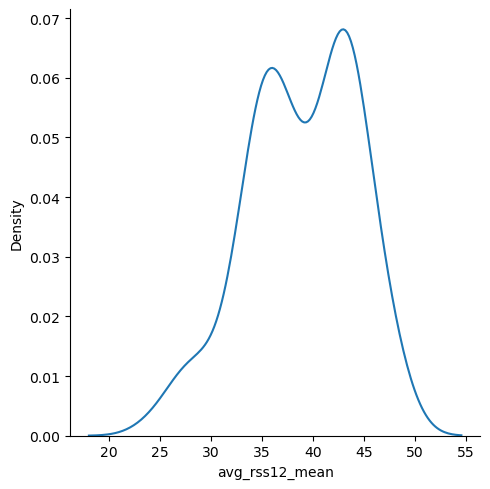

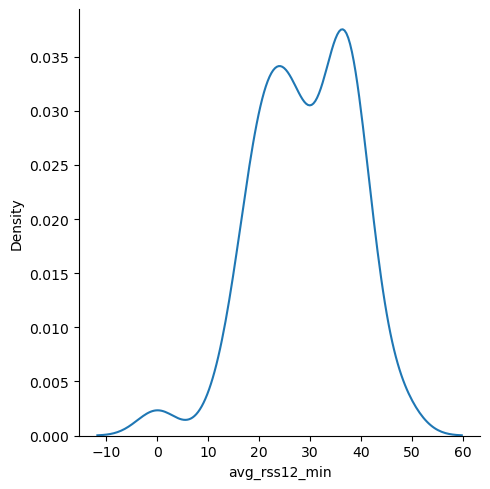

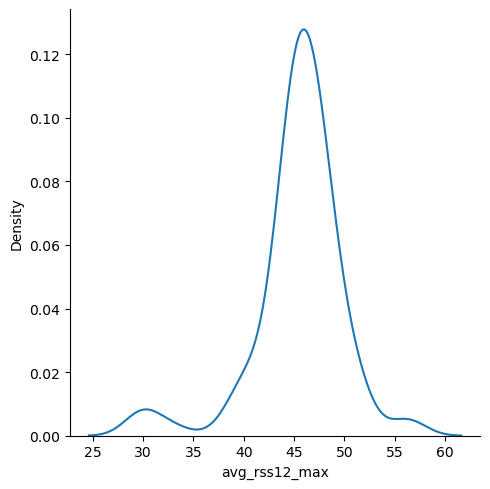

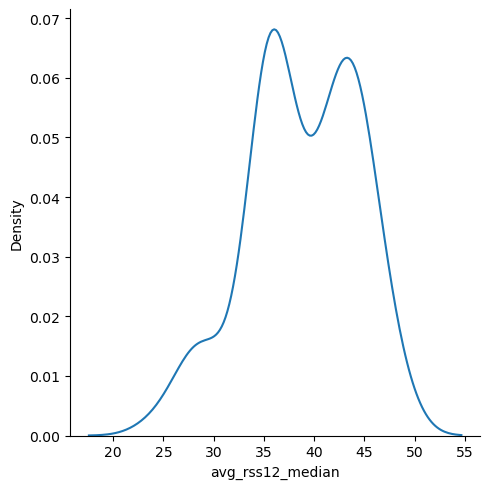

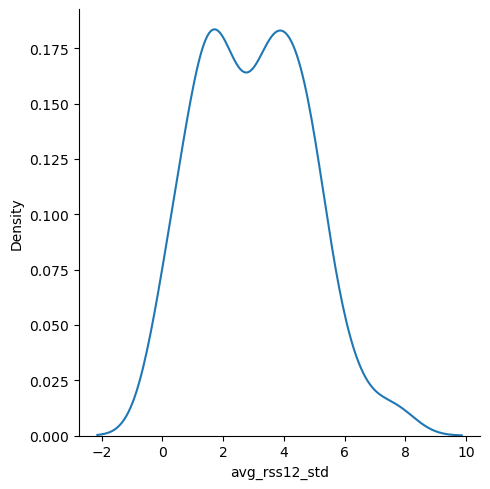

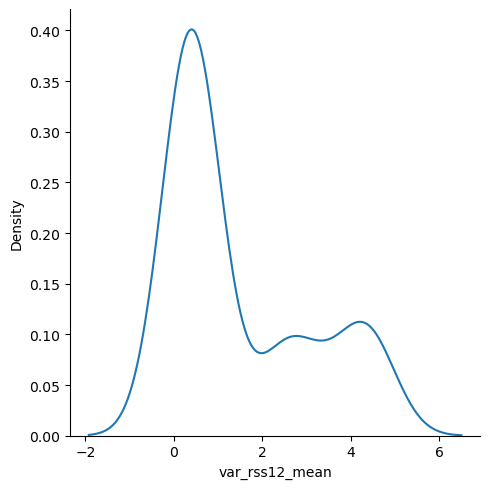

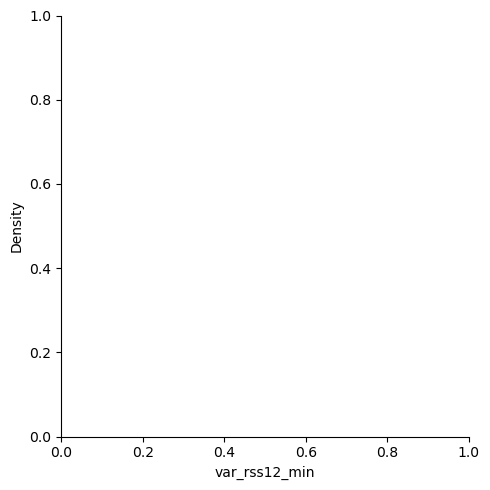

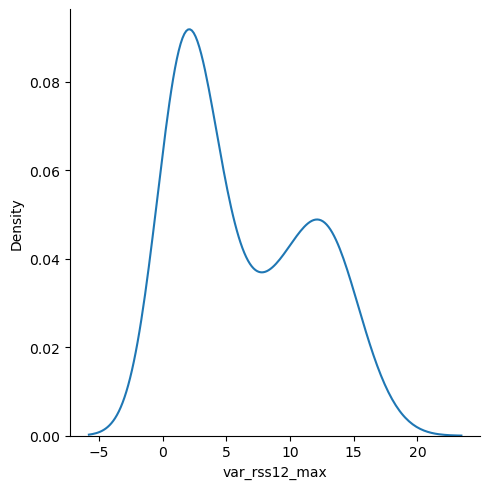

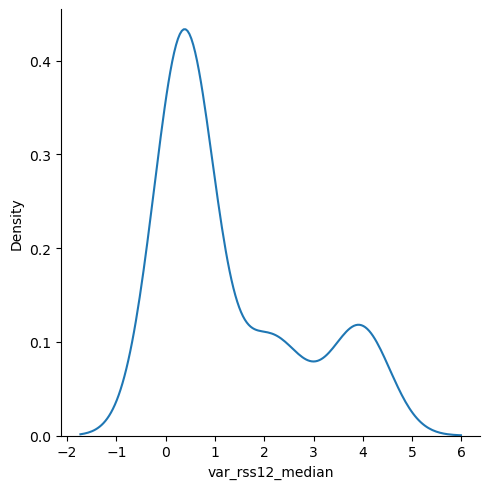

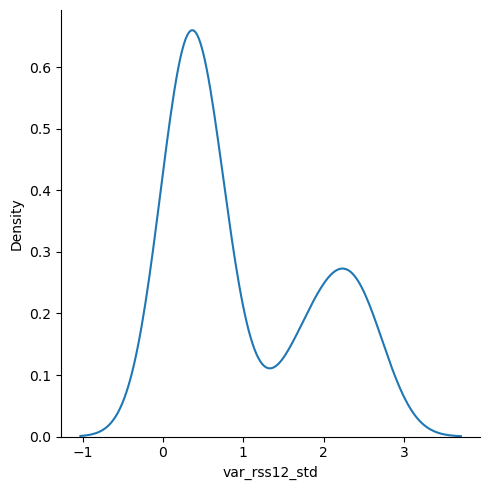

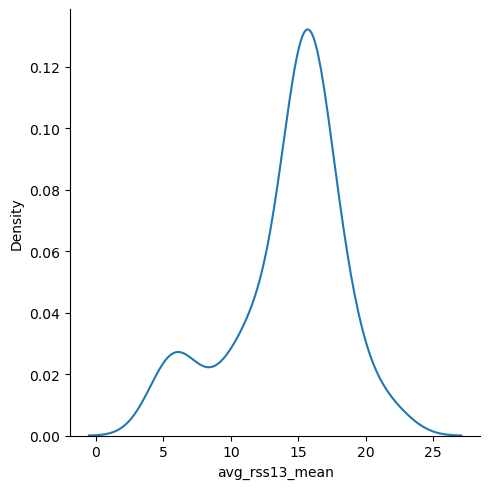

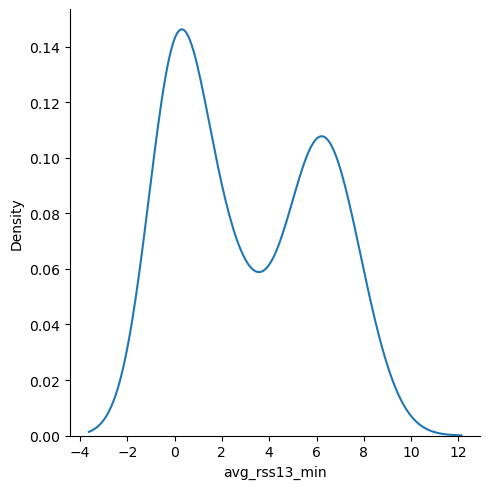

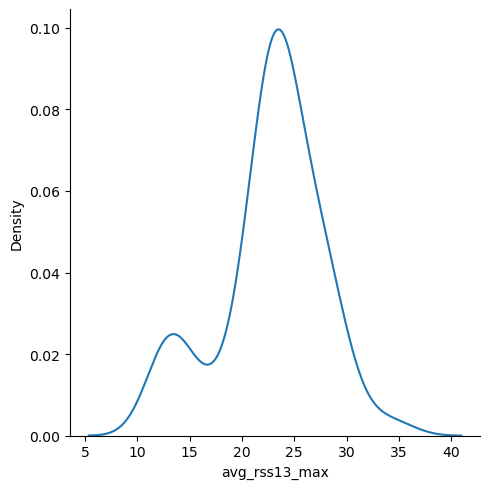

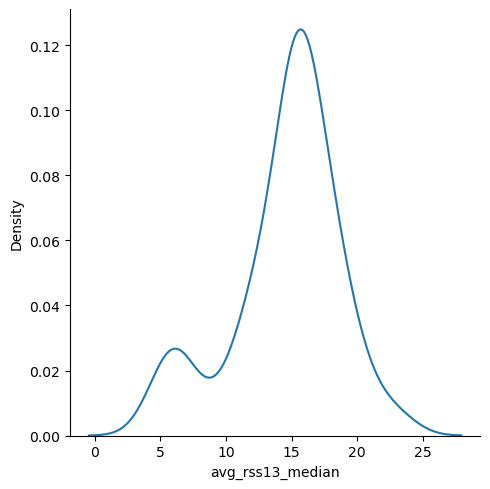

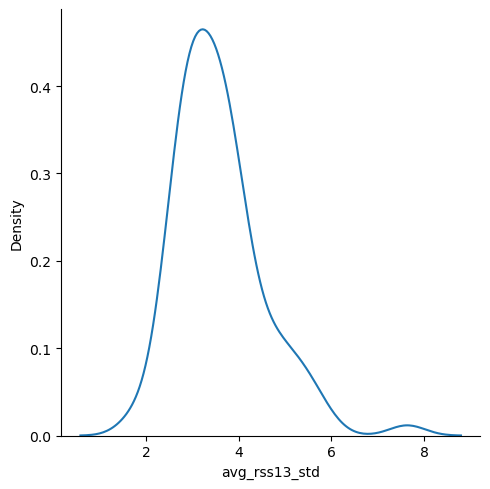

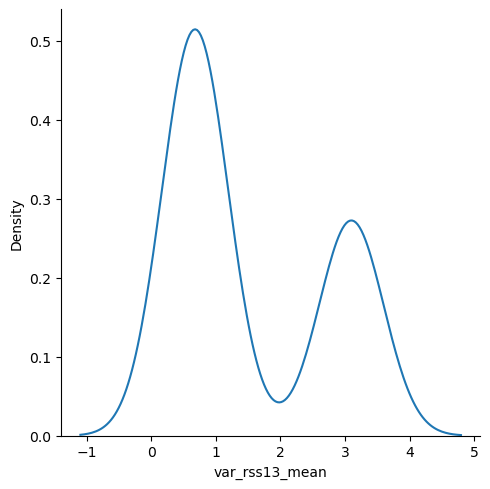

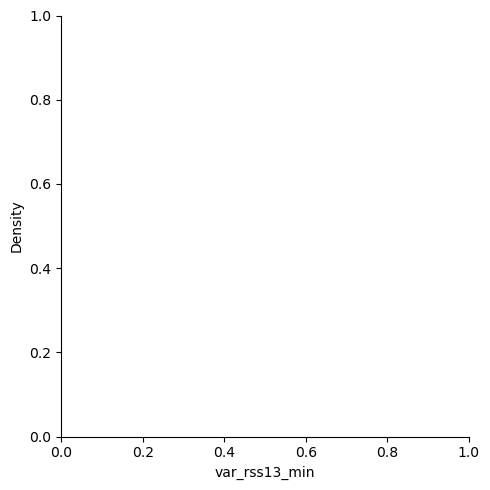

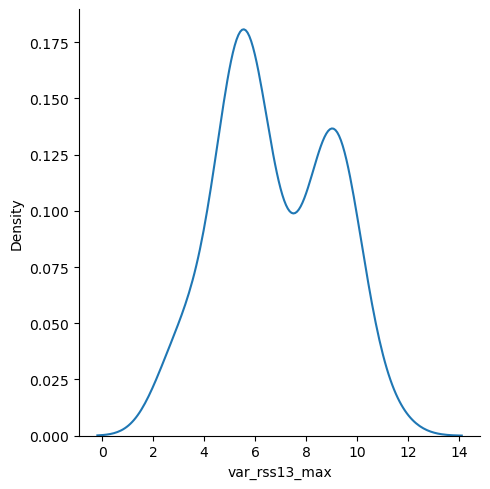

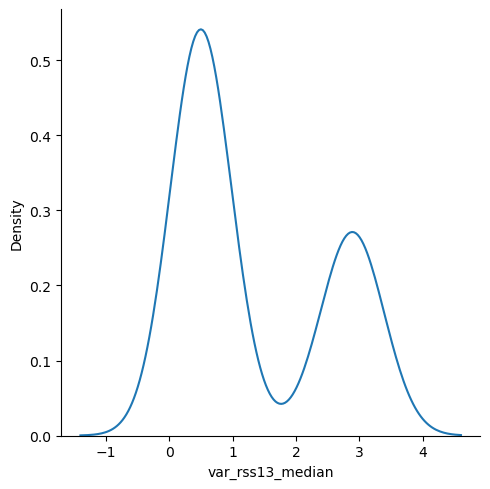

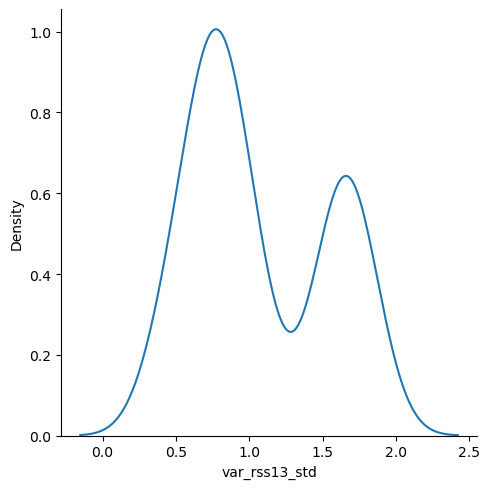

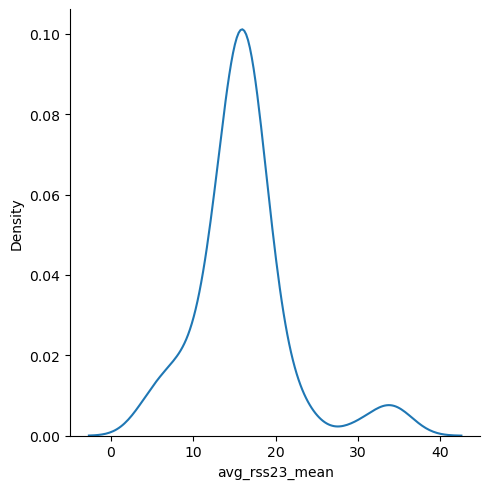

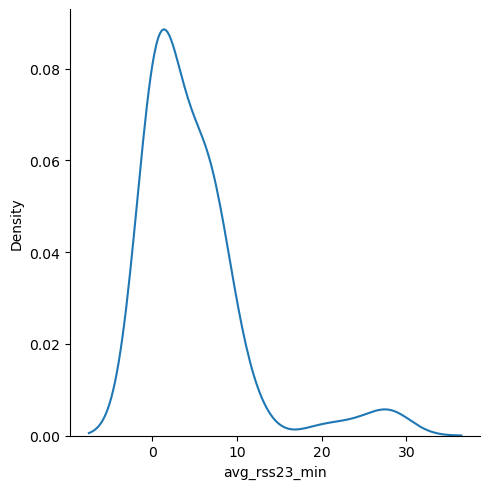

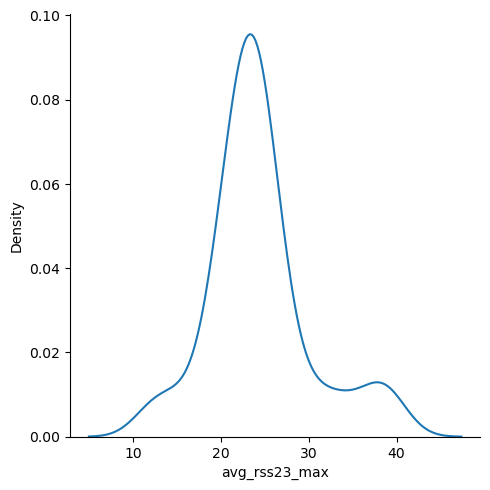

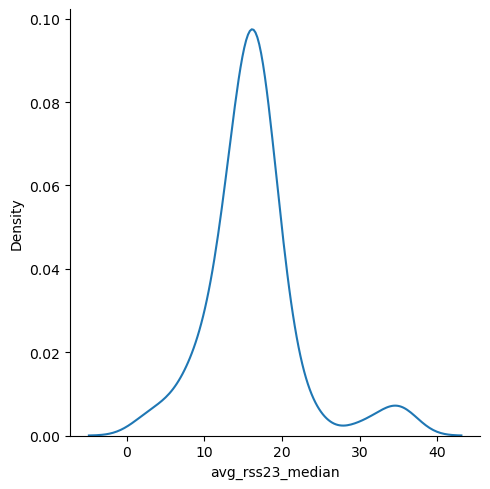

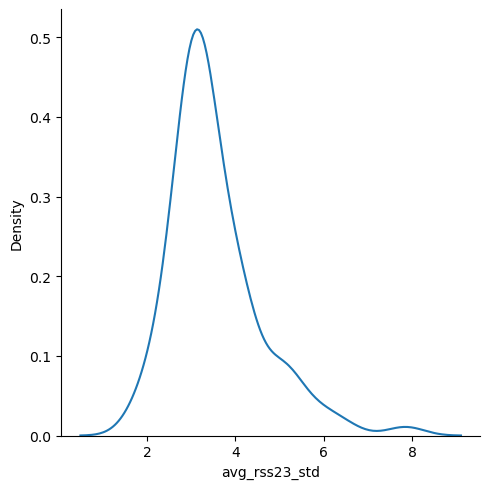

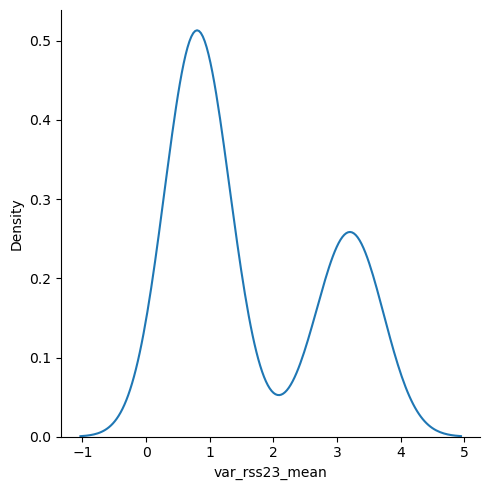

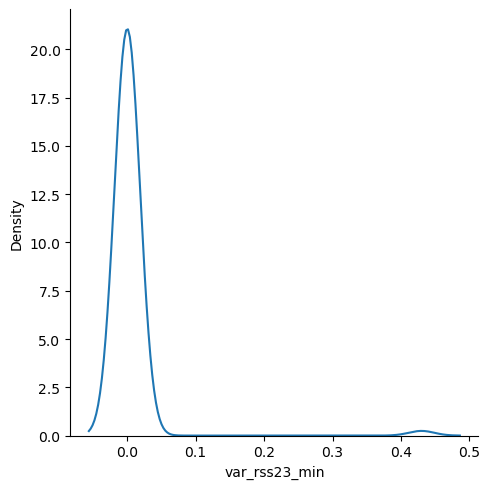

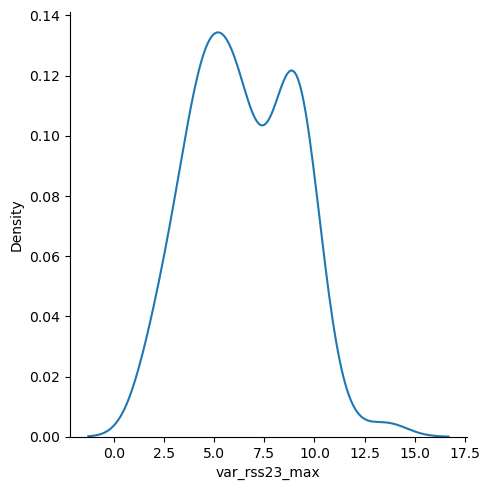

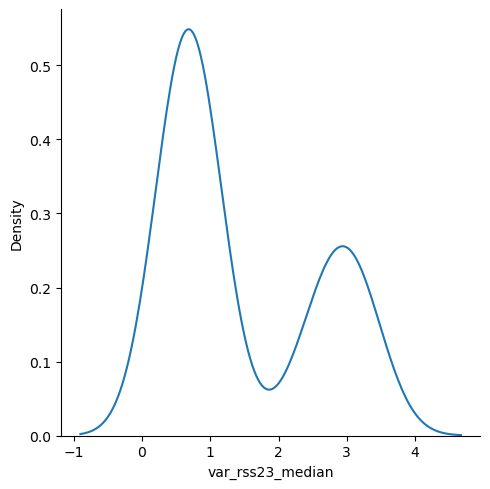

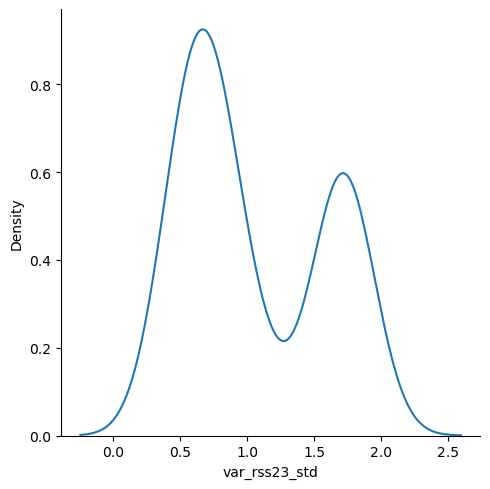

In [133]:
# Making density plots for all the time domain features with the labels(instance)to assess their importance

for i in range(1,43,1):
    sns.displot(data=result, x=df_vis.iloc[:,i], kind="kde")

    plt.show()

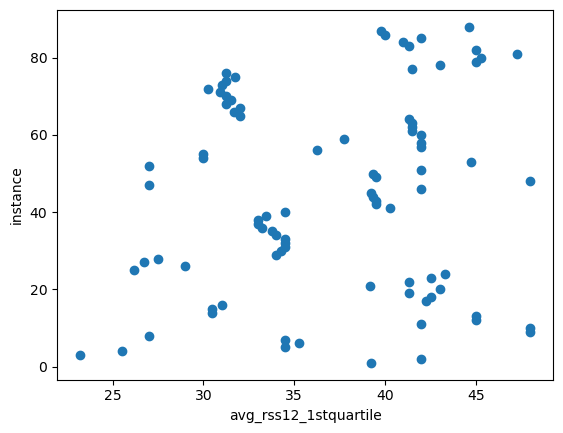

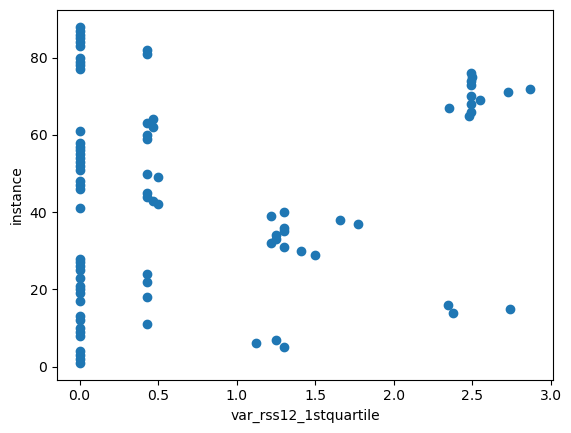

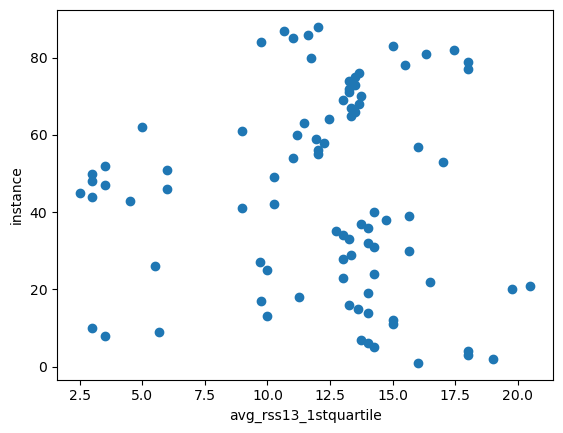

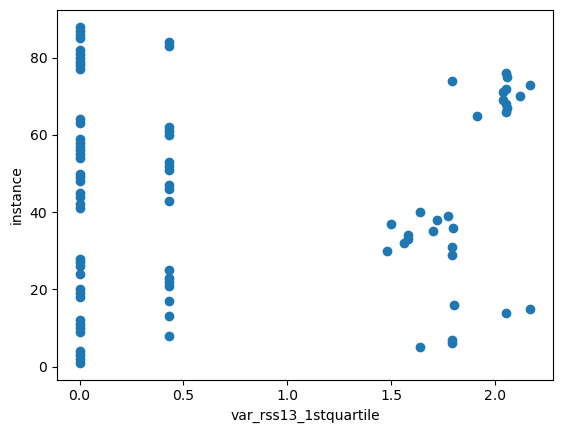

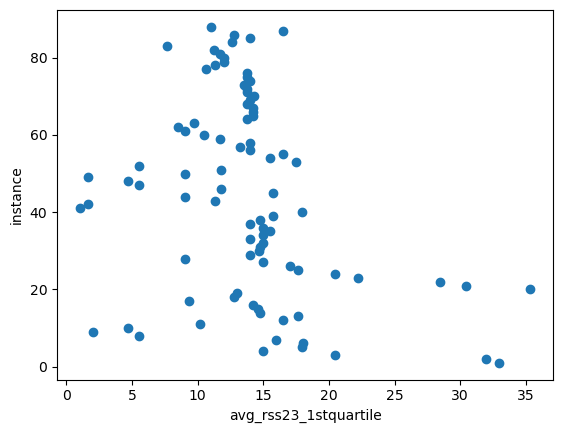

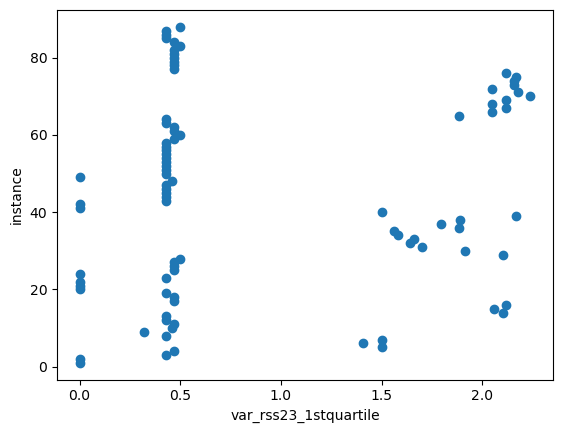

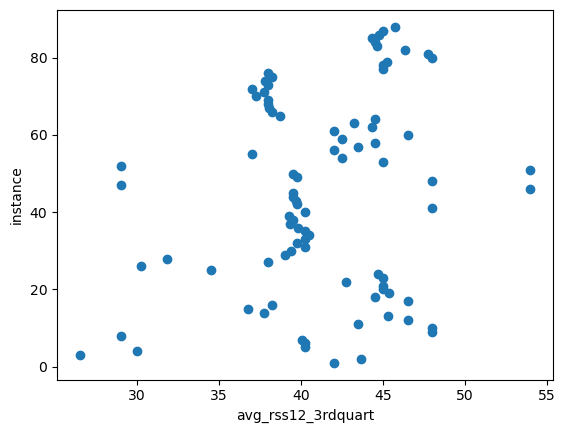

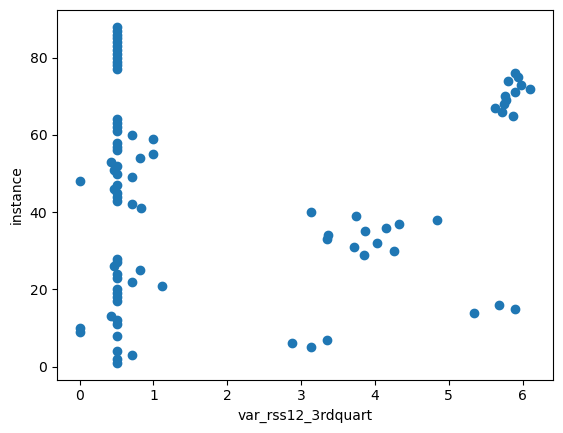

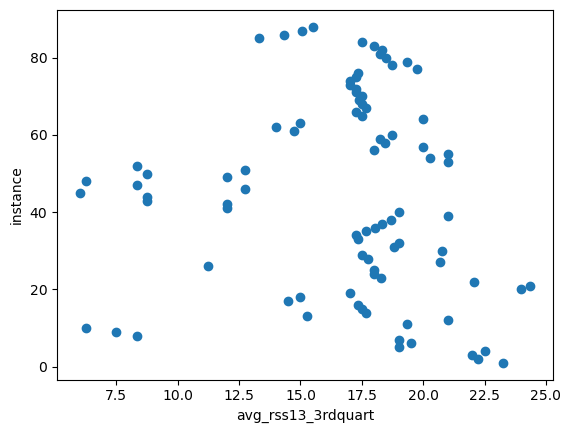

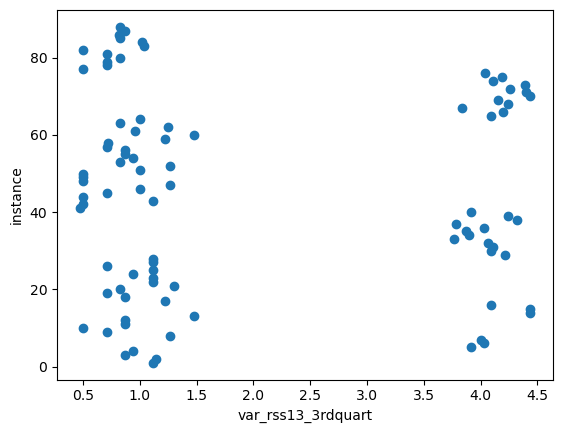

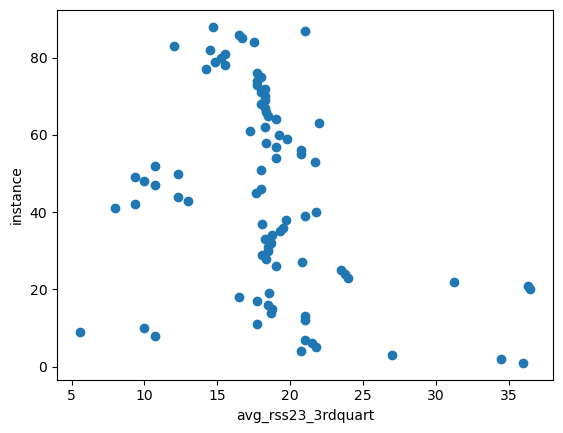

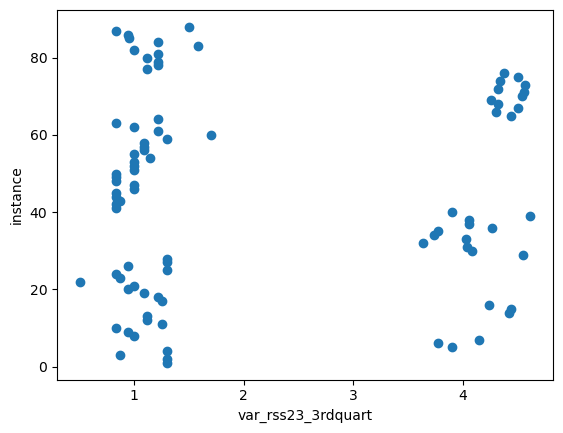

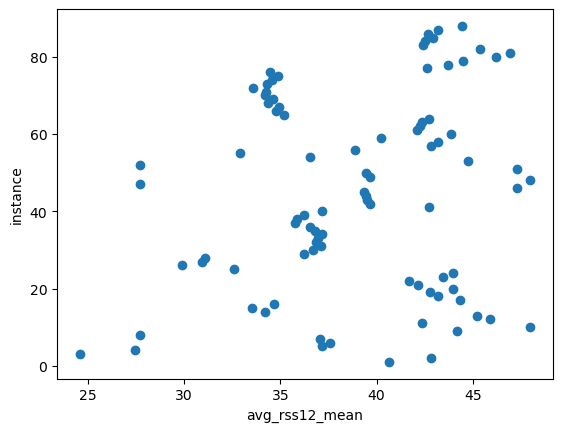

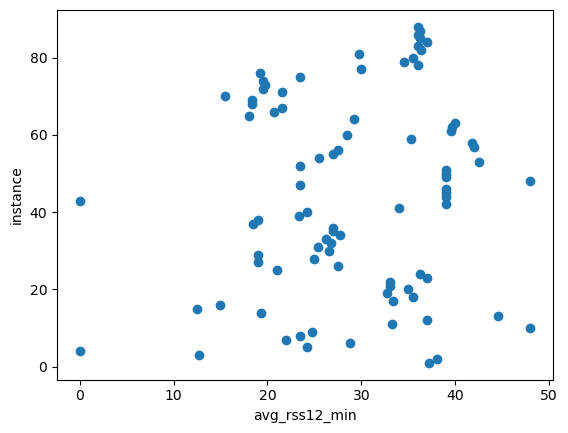

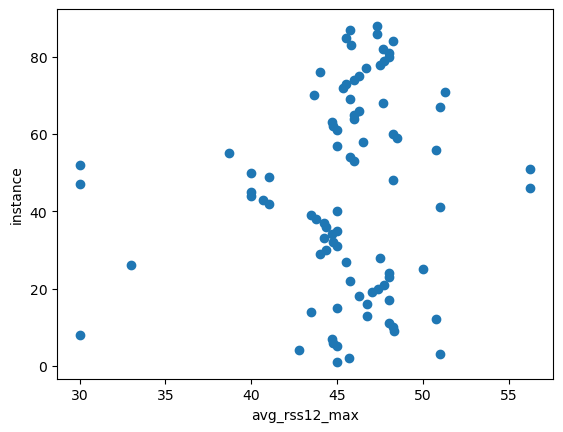

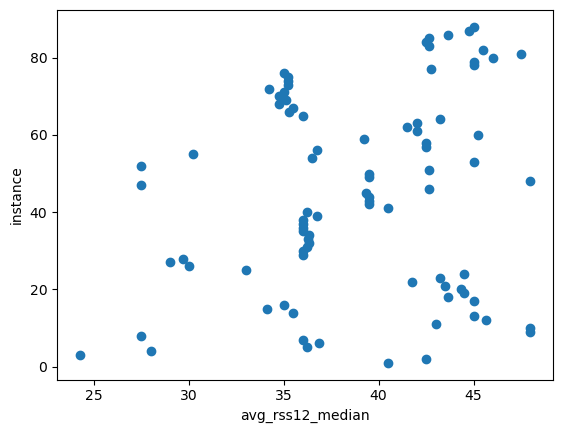

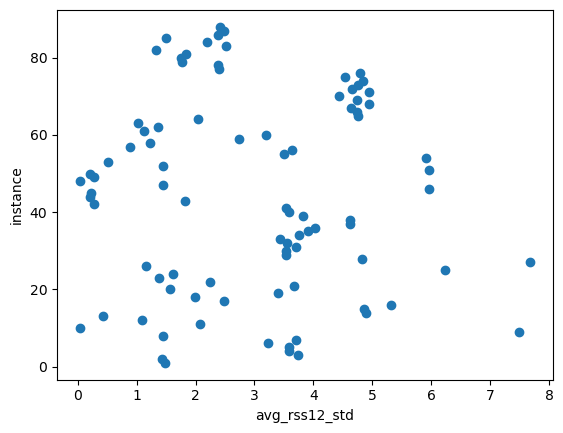

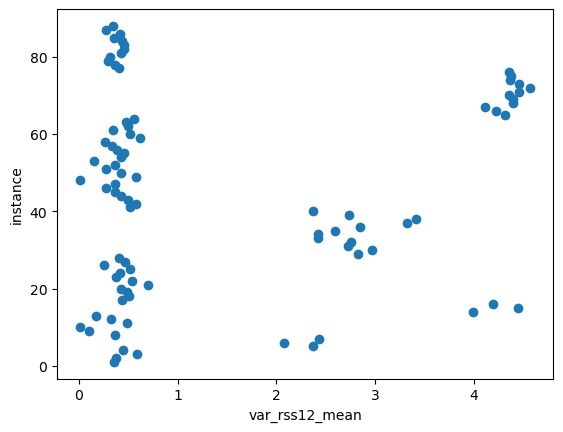

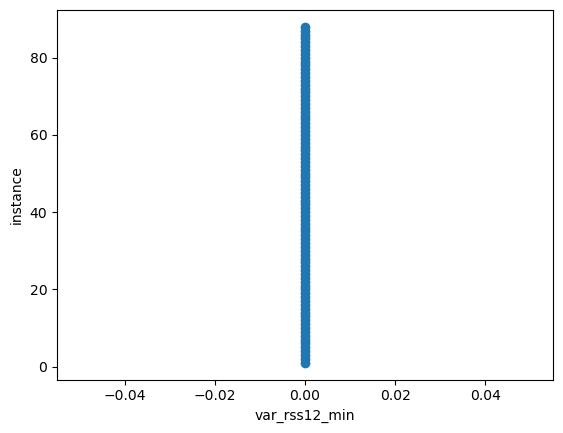

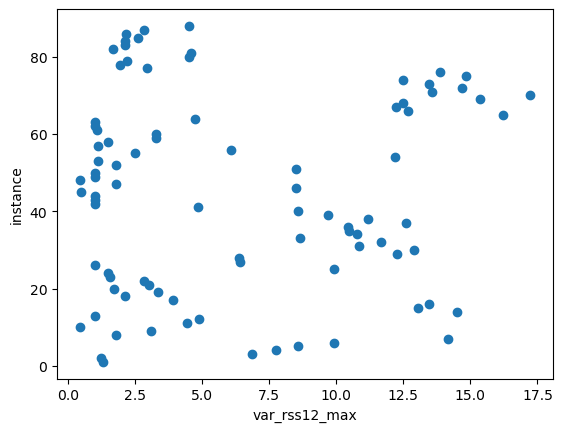

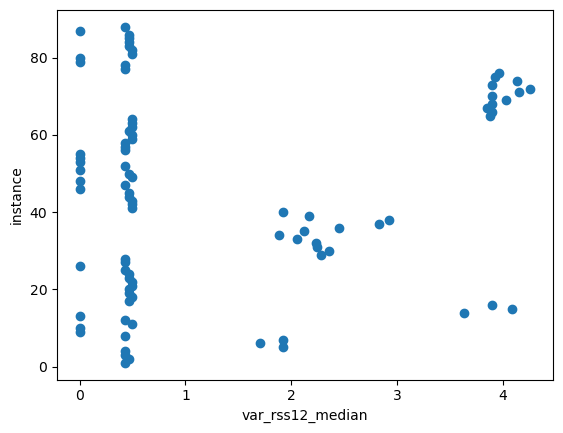

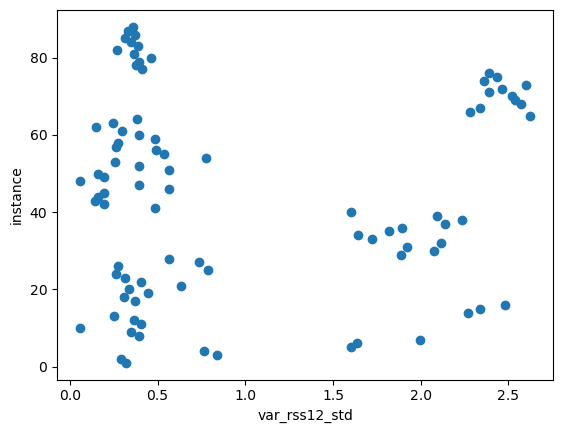

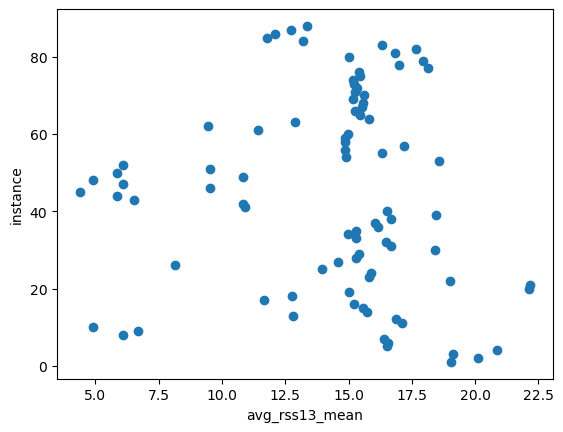

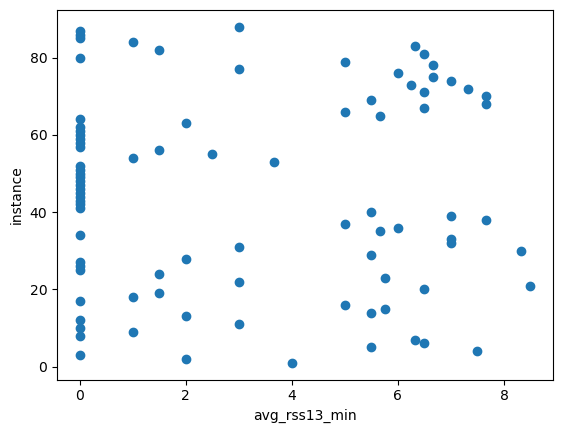

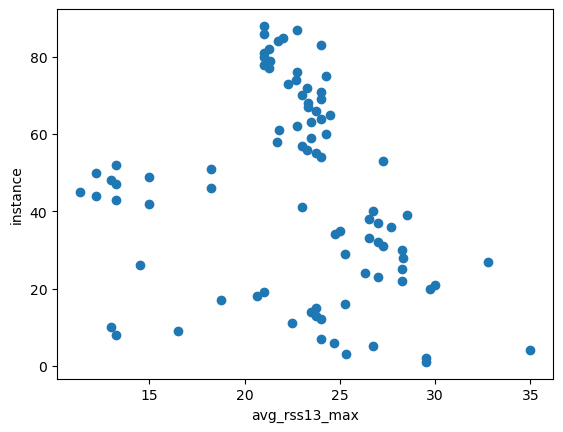

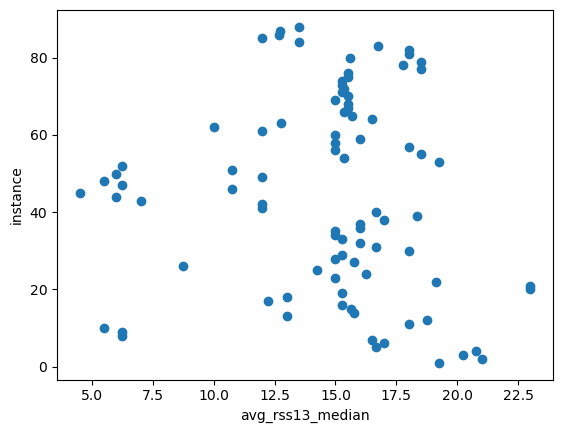

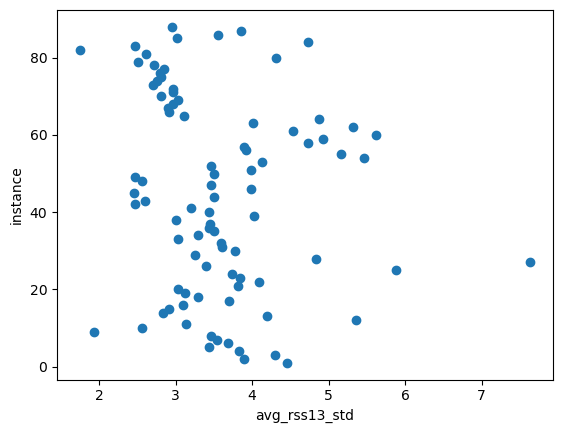

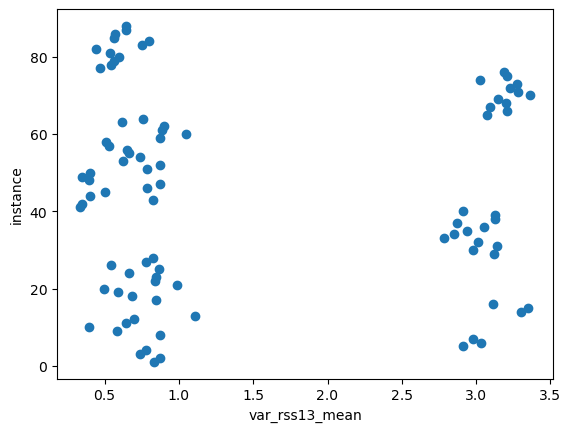

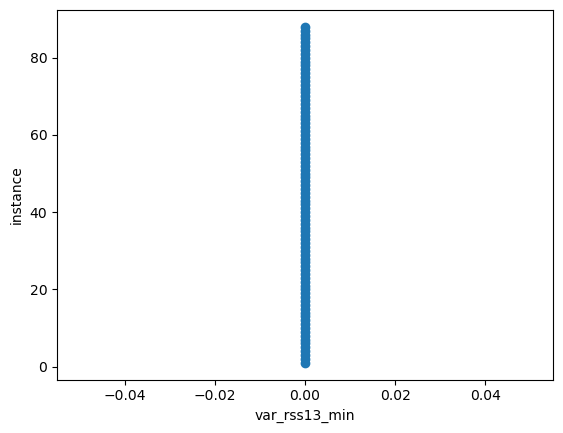

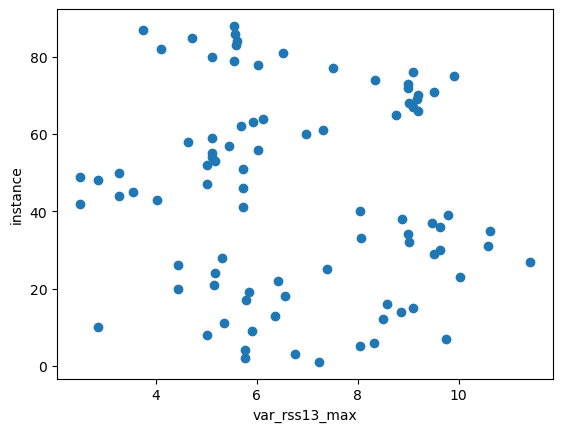

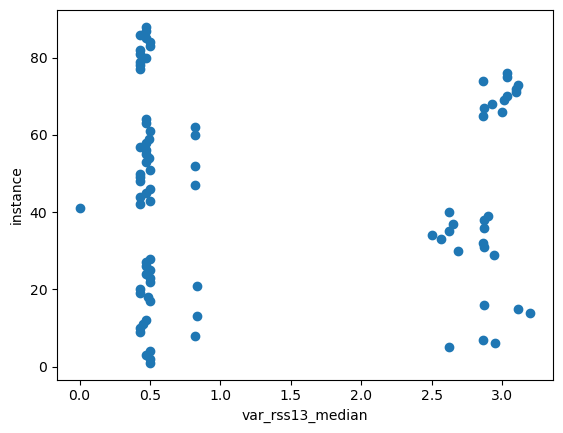

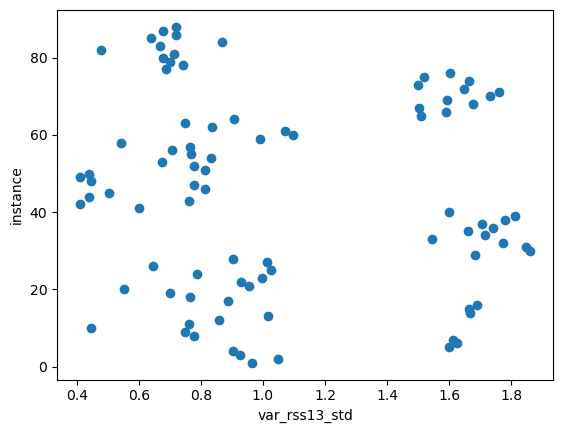

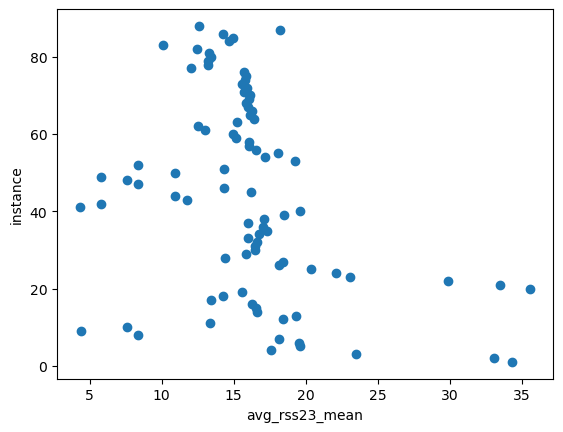

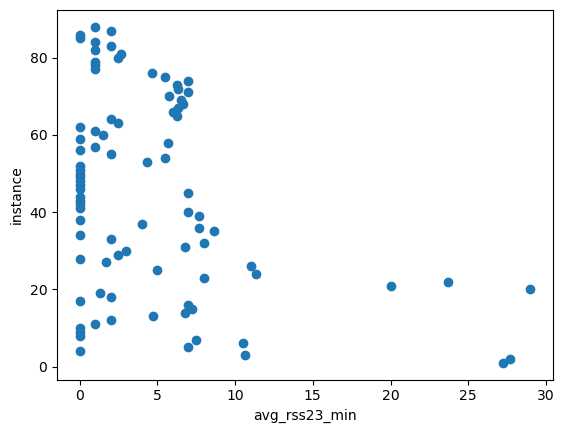

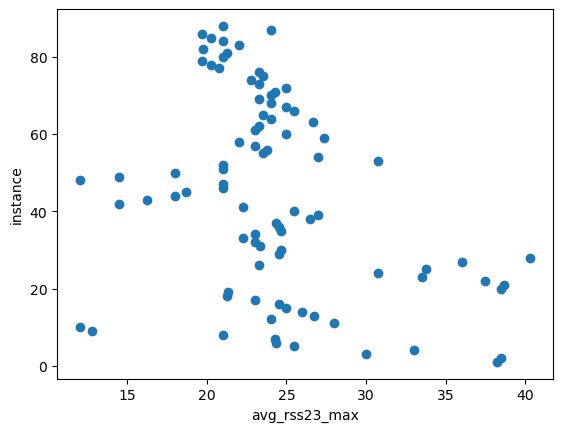

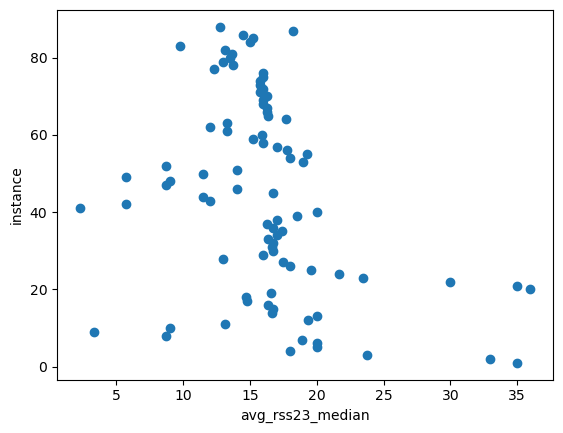

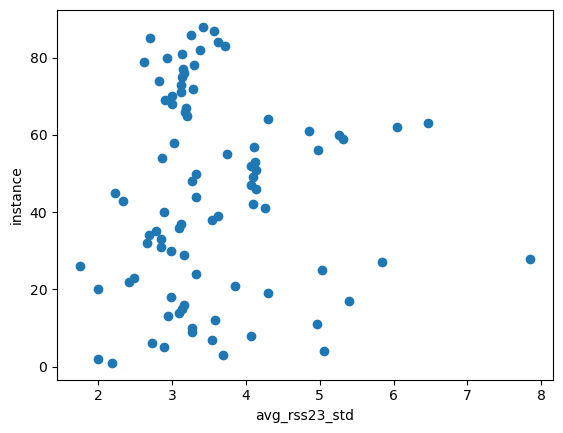

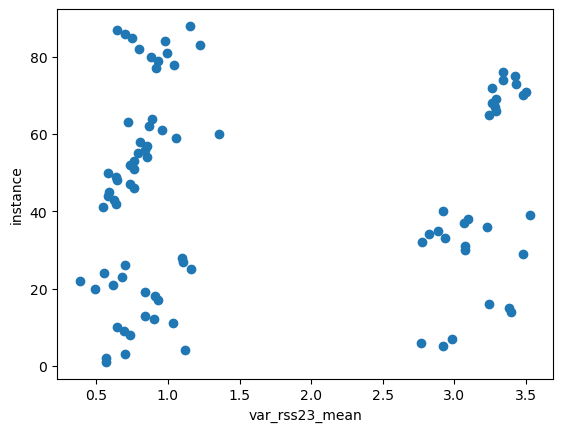

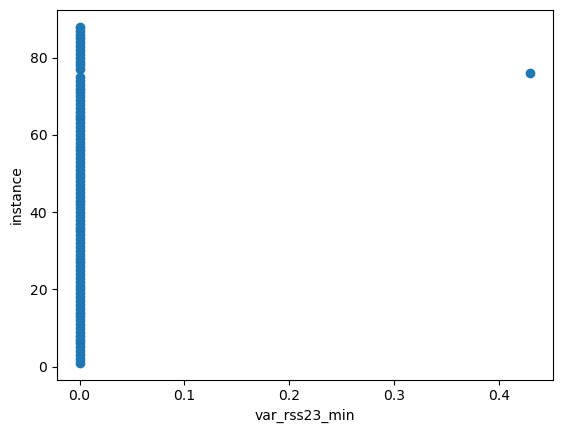

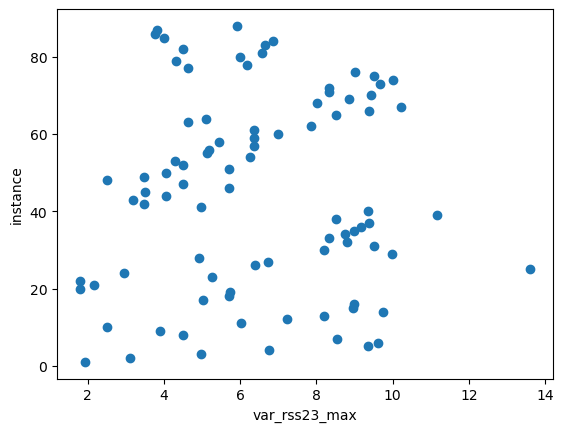

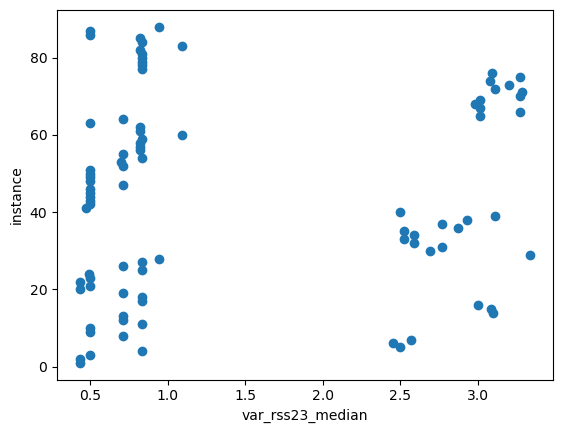

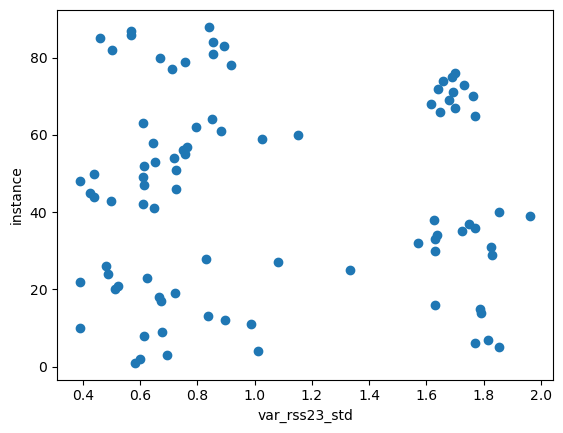

In [137]:
x = df_vis.columns.values.tolist()
for i in range(1,43,1):
    plt.scatter(df_vis.iloc[:,i], df_vis["dataset"])
    plt.xlabel(f'{x[i]}')
    plt.ylabel("instance")
    plt.show()

Since most important time-domain features will be the ones that are the most correlated with the labels, in our case, the most important time-domain features will be the ones most correlated with instances. 
The best three time-domain features are mean, median and standard deviation.

### ISLR 3.7.4

- 4a. If the true relationship between X and Y is linear, then fitting a cubic model would overfit the data, adding unnecessary complexity. As a result, the linear training RSS will be lower than the cubic training RSS. This is because the linear regression would have a simpler model that fits the data better.
- 4b. The linear regression model is more likely to have a lower test RSS than the cubic regression model because the cubic regression model contains more predictors which can cause overfitting to the training data. As a result, the cubic regression model will not be generalizable for new, unseen data.
- 4c. There is not enough information to tell because even though we are told that the true relation is not linear, we do not know what form it takes and whether it is closer to linear or a complex fucntional form. If it is close to linear, linear regression model will have lower RSS, if it is more complex, the cubic regression is more likely to have a lower RSS.
- 4c. There is again not enough information for reasons stated ic 4.c